In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

url = 'https://raw.githubusercontent.com/tasdikrahman/datasets/master/email/csv/spam-apache.csv'
df = pd.read_csv(url, header=None)

data = df.to_numpy()

#print(data)

In [ ]:
train,test = np.split(data,[int(0.80 * len(data))])

print(f"num of training examples: {train.shape[0]}")
print(f"num of testing examples: {test.shape[0]}")

num of training examples: 200
num of testing examples: 50


In [ ]:
spam = train[train[:, 0]==-1, 1]
ham = train[train[:, 0]==1, 1]

print(ham.shape[0]) #print(len(ham))
print(spam.shape[0])

99
101


In [ ]:
words = ['As seen on NBC, CBS, CNN', 'Help wanted', 'increase', 'FREE', 'office', 'http:', 'Hi', 'From:', 'To:', '#', 'but']

word_dic = {}

sc = 0
hc = 0

def word_search(pred):
  sc = 0
  hc = 0

  for line in train:
    if line[1].find(pred) != -1:
      if line[0] == -1:
        sc += 1
      else:
        hc += 1
    array = [sc, hc]
  return (array)

for x in words:
  word_dic[x] = word_search(x)

word_dic

{'As seen on NBC, CBS, CNN': [5, 0],
 'Help wanted': [5, 0],
 'increase': [5, 1],
 'FREE': [27, 0],
 'office': [12, 3],
 'http:': [72, 45],
 'Hi': [4, 12],
 'From:': [0, 7],
 'To:': [2, 5],
 '#': [15, 5],
 'but': [15, 49]}

In [ ]:
def zero_conv(dictionary):
  for word in word_dic.keys():
    if (word_dic[word][0] == 0.0):
      word_dic.update({word: [0.0000000001, word_dic[word][1]] })
    if (word_dic[word][1] == 0.0):
      word_dic.update({word: [word_dic[word][0], 0.0000000001] })


for x in words:
  sum = word_dic[x][0] + word_dic[x][1]
  word_dic[x] = [word_dic[x][0] / sum , word_dic[x][1] / sum]

zero_conv(word_dic)

word_dic

{'As seen on NBC, CBS, CNN': [1.0, 1e-10],
 'Help wanted': [1.0, 1e-10],
 'increase': [0.8333333333333334, 0.16666666666666666],
 'FREE': [1.0, 1e-10],
 'office': [0.8, 0.2],
 'http:': [0.6153846153846154, 0.38461538461538464],
 'Hi': [0.25, 0.75],
 'From:': [1e-10, 1.0],
 'To:': [0.2857142857142857, 0.7142857142857143],
 '#': [0.75, 0.25],
 'but': [0.234375, 0.765625]}

In [ ]:
bias = np.log(len(spam) / len(ham))
bias

0.020000666706669435

In [ ]:
#observed_words = ['increase', 'FREE', 'Hi']

def SpamHam(observed_words, array):

  a = bias
  for word in observed_words:
    a += np.log(word_dic[word][1] / word_dic[word][0])

  if(a > 0): 
    array.append(1)
  elif (a==0):
    array.append(0)
  else: 
    array.append(-1)

  return array


In [ ]:
emails = test[:, 1]
labels = np.array(test[:, 0], dtype='int16')
labels

array([-1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1],
      dtype=int16)

In [ ]:
# This is the start of the FILTER 

predicted_labels = []

for lines in emails:
  observed_words = []
  #lines = emails.split(' ')
  for w in word_dic.keys():
    if lines.find(w) != -1:
      observed_words.append(w)
  SpamHam(observed_words, predicted_labels)

predicted_labels = np.array(predicted_labels)
predicted_labels

array([-1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1])

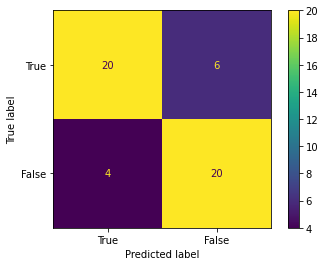

In [ ]:
#results

confusion_matrix = metrics.confusion_matrix(predicted_labels,labels)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(labels, predicted_labels)
print("Accuracy ", Accuracy*100, '%')

Accuracy  80.0 %
